## Stock Prediction Framework: Timeseries

### packages

In [4]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

### read and preminant time series analysis

In [5]:
df = pd.read_csv("./training_and_test/yahoo_stock.csv")
df.set_index('Date', inplace=True)
df['Daily_returns'] = df['Adj Close'].pct_change()
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily_returns
Date,,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,0.001222
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,-0.000129
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,0.000000
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,0.000594


### plot and split to train and test, 70% to 30%

Text(0.5, 1.0, ' Yahoo Stock Plot for Overall Period')

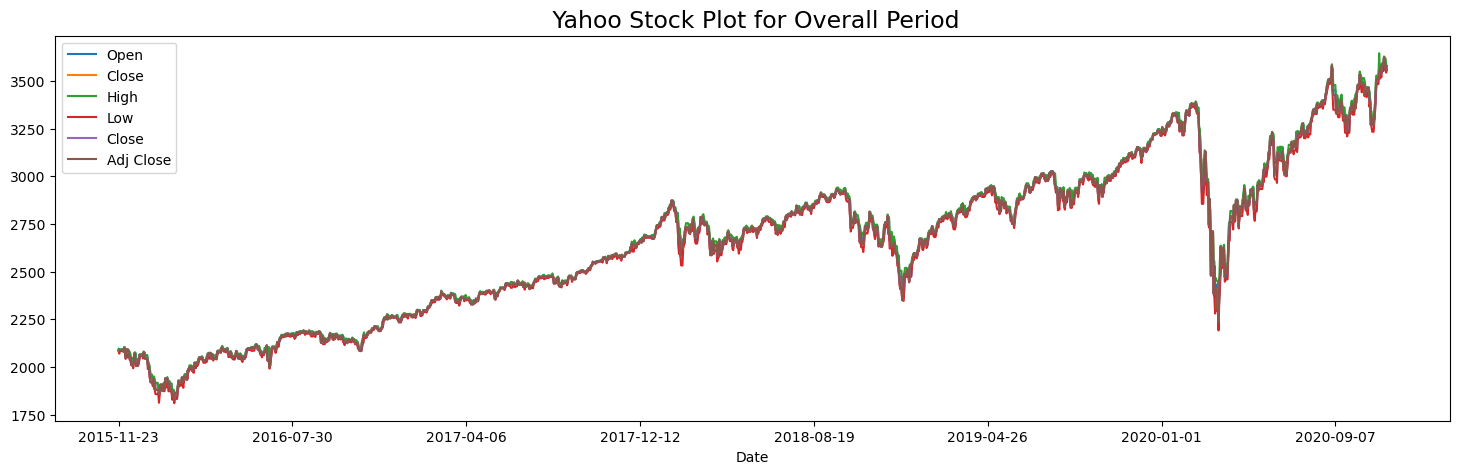

In [7]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Yahoo Stock Plot for Overall Period", fontsize=17)

test_pct = 0.3

## Time Series Analysis: Naive 
朴素法， 即所有的预测值等于所选择时间序列的最后一个值